### Image Dataset

This notebook is designed to prepared the dataset object that will go into the model.

In [2]:
import os 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.image as mpimg
import pandas as pd
from torchvision import transforms
from torchvision.transforms import v2
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
img_dir = 'images_png'
data = pd.read_csv('data_info_file.csv')

In [4]:
class MammoDataset(Dataset):

    def __init__(self, img_dir, data, transform=None, train=True ):
        self.img_dir = img_dir
        self.transform = transform
        self.data = data
        
        if train:
            self.data = self.data[self.data['split'] == 'training']
        else:
            self.data = self.data[self.data['split'] == 'test']


    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img_path = os.path.join( self.img_dir, self.data.iloc[index, 0], self.data.iloc[index, 2] + '.png' )
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)
        
        return img 

In [6]:
train_data = MammoDataset(img_dir, data, transform=transforms.Compose([ v2.ToImage(), v2.Resize((512, 512))]) )  # transform=transforms.Compose([ transforms.Resize(512), transforms.ToTensor()])
test_data = MammoDataset(img_dir, data, transform=transforms.Compose([ v2.ToImage(), v2.Resize((512, 512))]), train=False)  # transform=transforms.Compose([ transforms.Resize(512), transforms.ToTensor()]),

In [7]:
train_data[1].shape

torch.Size([1, 512, 512])

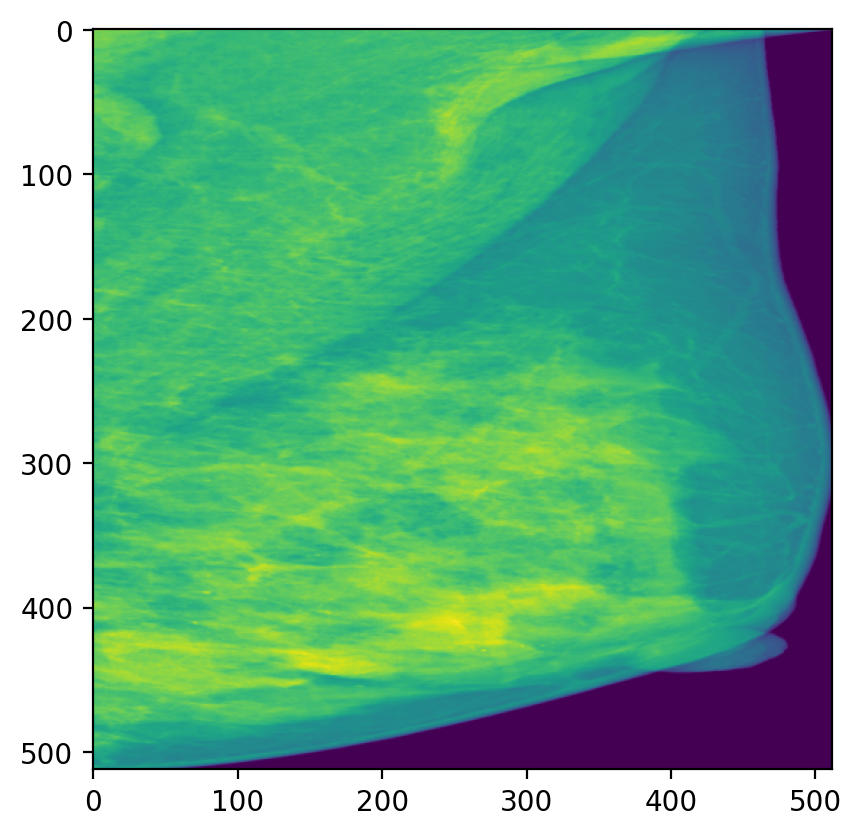

In [8]:
plt.imshow(train_data[1].permute(1,2,0))

In [9]:
len(train_data), len(test_data)

(16000, 4000)

### 

In [28]:
import os
import pydicom
import pandas as pd
import matplotlib.image as mpimg

sample_1 = 'sample/00a6b0d56eb5136c1be2c3d624b04dad.dicom'
sample_2 = 'sample/0a4004a005e1d213aed0691106d8772f.dicom'
modified_1 = 'images_png/05454cd8006c310504af7d8c0f6adb15/00a6b0d56eb5136c1be2c3d624b04dad.png'
modified_2 = 'images_png/1a5c56c6f83b913488686f7fca265194/0a4004a005e1d213aed0691106d8772f.png'


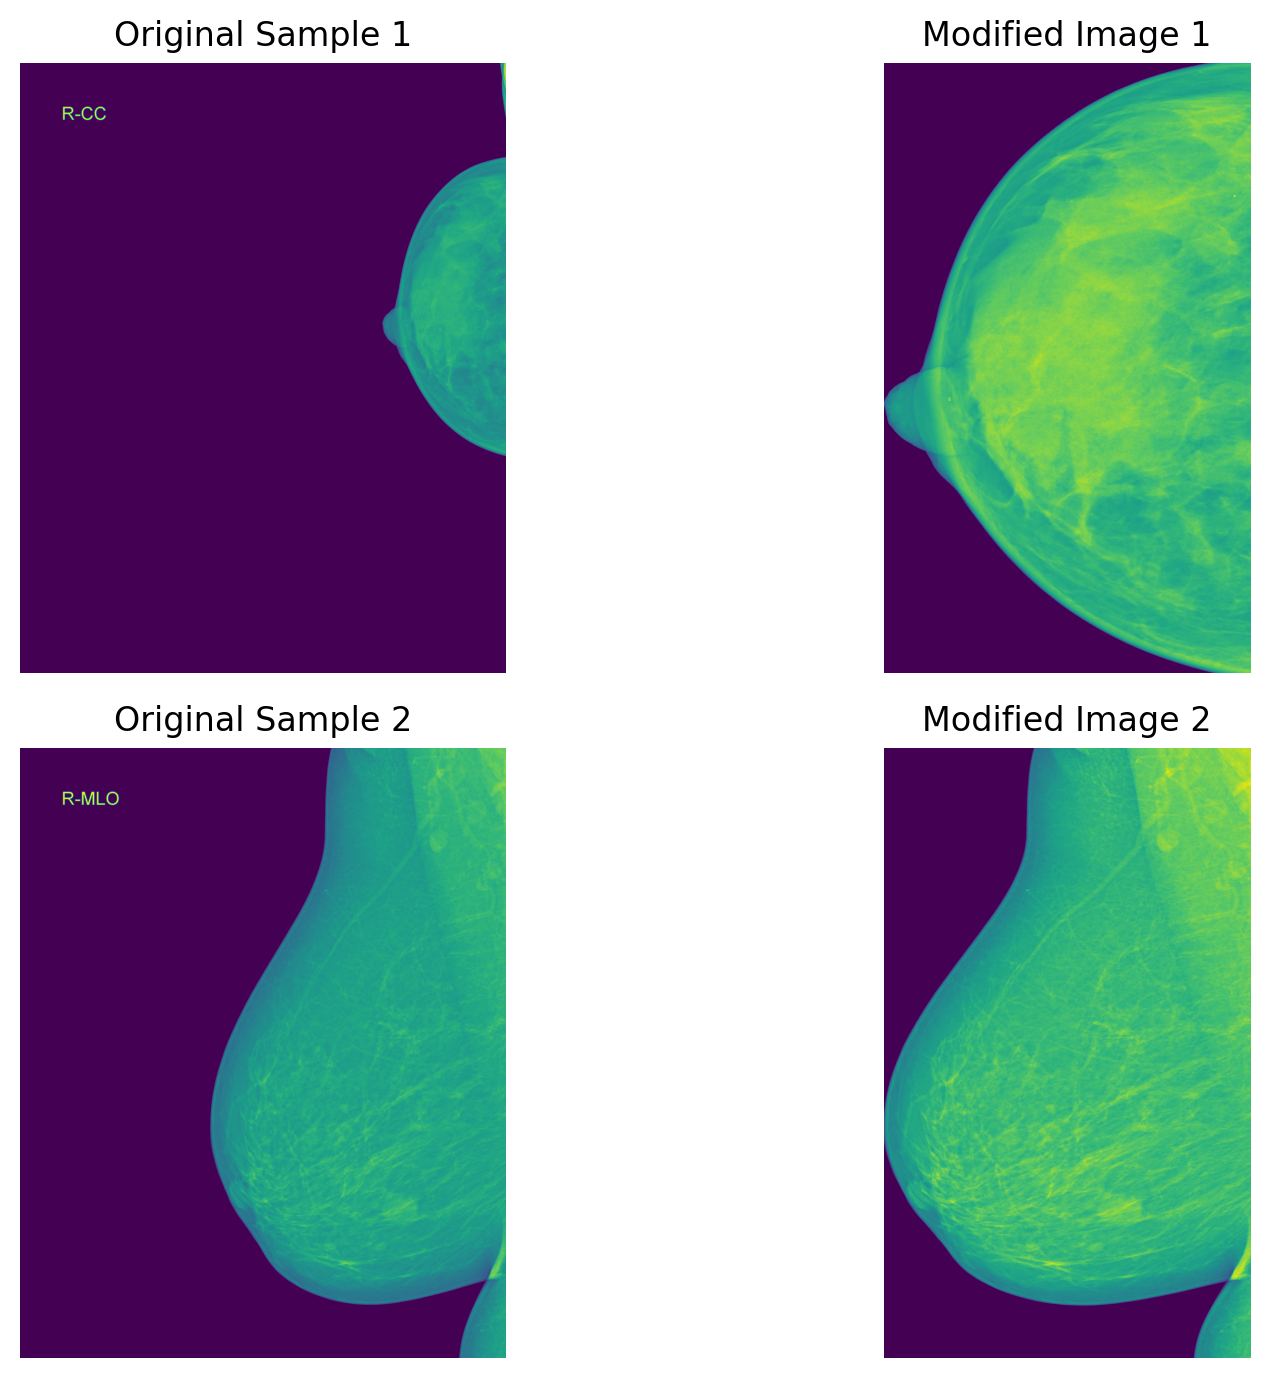

In [39]:
# Load the DICOM images
dicom_image_1 = pydicom.dcmread(sample_1)
dicom_image_2 = pydicom.dcmread(sample_2)
dicom_pixel_array_1 = dicom_image_1.pixel_array
dicom_pixel_array_2 = dicom_image_2.pixel_array

# Load the modified PNG images
png_image_1 = mpimg.imread(modified_1)
png_image_2 = mpimg.imread(modified_2)

# Plotting the images side by side
plt.figure(figsize=(10, 7))

# Display the DICOM images
plt.subplot(2, 2, 1)
plt.imshow(dicom_pixel_array_1)
plt.title('Original Sample 1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(dicom_pixel_array_2)
plt.title('Original Sample 2')
plt.axis('off')

# Display the modified PNG images
plt.subplot(2, 2, 2)
plt.imshow(png_image_1)
plt.title('Modified Image 1')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(png_image_2)
plt.title('Modified Image 2')
plt.axis('off')

plt.tight_layout()
plt.savefig('report_output/image_transformation.png')

In [22]:
data[data.image_id == '0a4004a005e1d213aed0691106d8772f']

,study_id,series_id,image_id,split,breast_birads,Age
4691,1a5c56c6f83b913488686f7fca265194,34705095ab6dddb48dbe9cd1b21495db,0a4004a005e1d213aed0691106d8772f,training,BI-RADS 2,54
